과제. Pandas 연습문제 풀이 

마지막 참고사항. 
붗꽃 데이터는 분류모델로 자주 쓰여. setosa, versicolor, virginica 3개종을 잘 예측할 수록 분류모델 성능 업.
이상치 제거는 분류모델의 성능을 향상시키기 위해 하는 것이기에 . 
종별로 이상치를 제거하여. discibe()를 답으로 보여주기엔 어색하다. 
종을 구분하지 않고. iris 데이터프레임에서 직접 이상치를 제거하고, (4개의 컬럼이 될것) 통계요약을 보여줘야 분류모델의 성능을 향상시키는데 
쓸모가 있을것이다.  

1. 아이리스 데이터 
     -  a. 종별로 기초통계량 구하기 descirbe()

In [128]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [129]:
#iris 데려오려고 씨본 임포트
# 사이킷런의 iris.keys() 로 나오는 데이터와는 차이가 있다. 애초에 사이킷런의 데이터셋은 df가 아니기도 하고.
iris = sns.load_dataset('iris')
# iris.head(3)
iris.species.unique()
# iris.target
# iris.keys()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

* class_setosa

In [130]:
# a 종별로 기초통계량 구하기  # 'setosa', 'versicolor', 'virginica'
# iris.describe()
# iris[iris.species == 'setosa']

class_setosa = iris[iris.species == 'setosa'].describe()       # class = setosa
class_setosa.style.set_caption('class : SETOSA')

,sepal_length,sepal_width,petal_length,petal_width
count,50.000000,50.000000,50.000000,50.000000
mean,5.006000,3.428000,1.462000,0.246000
std,0.352490,0.379064,0.173664,0.105386
min,4.300000,2.300000,1.000000,0.100000
25%,4.800000,3.200000,1.400000,0.200000
50%,5.000000,3.400000,1.500000,0.200000
75%,5.200000,3.675000,1.575000,0.300000
max,5.800000,4.400000,1.900000,0.600000


* class_versicolor

In [131]:
class_versicolor = iris[iris.species == 'versicolor'].describe()  
class_versicolor.style.set_caption('class : VERSICOLOR')

,sepal_length,sepal_width,petal_length,petal_width
count,50.000000,50.000000,50.000000,50.000000
mean,5.936000,2.770000,4.260000,1.326000
std,0.516171,0.313798,0.469911,0.197753
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.525000,4.000000,1.200000
50%,5.900000,2.800000,4.350000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,7.000000,3.400000,5.100000,1.800000


* class_virginica

In [132]:
class_virginica = iris[iris.species == 'virginica'].describe()  
class_virginica.style.set_caption('class : VIRGINICA')

,sepal_length,sepal_width,petal_length,petal_width
count,50.000000,50.000000,50.000000,50.000000
mean,6.588000,2.974000,5.552000,2.026000
std,0.635880,0.322497,0.551895,0.274650
min,4.900000,2.200000,4.500000,1.400000
25%,6.225000,2.800000,5.100000,1.800000
50%,6.500000,3.000000,5.550000,2.000000
75%,6.900000,3.175000,5.875000,2.300000
max,7.900000,3.800000,6.900000,2.500000


b. 3분위수(Q3)와 1분위수(Q1)의 차이보다 1.5배가 크거나 작은 데이터는 이상치이다.
즉,
Q1 - 1.5 * (Q3 - Q1) 보다 작은 데이터
Q3 + 1.5 * (Q3 - Q1) 보다 큰 데이터
이 이상치를 제거하고 위의 4가지 항목에 대해서 평균, 표준편차를 구하시오.

In [7]:
# 이상치와 박스플롯에 대해 이해하고 있다면, (사분위수, 혹은 IQR)
# 곧바로 코드작성해서 문제없으나, 일단 이상치가 있는지 없는지 라도 확인해 보고자 한다. 
# 그림에서 o 로 표시된 데이터가, 최대값 or 최솟값을 벗어난 outlier이다. 처리방법 고민하자.

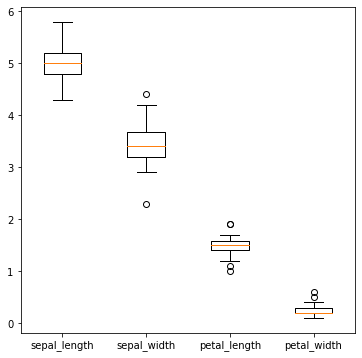

In [133]:
import matplotlib.pyplot as plt 

setosa = iris[iris.species == 'setosa'].iloc[:, : -1]
plt.figure(figsize=(6,6))
plt.boxplot(setosa, labels=class_setosa.columns)   # x축에 class_setosa 컬럼이름 표기하고자.
plt.show()

# setosa 각 컬럼의 이상치는 0, 2, 3, 2 개로 예상이 된다.

### 참고사항 길어서 맠다운. 숨겨둠

In [115]:
# 참고 
# DataFrame.describe(percentiles=None,
#                    include=None,
#                    exclude=None,
#                    datetime_is_numeric=False)

In [109]:
Q1 = np.percentile(setosa.sepal_length, 25)  # 1/4 분위수 1시그마라고 표현하려함. (맞는 표현 아니야.) 일사분위수 가 낳나?
Q3 = np.percentile(setosa.sepal_length, 75)  # 3/4 분위수
iqr = Q3 - Q1
print(Q1, Q3, iqr, np.dtype)
# 반복문 사용 고려해 인덱스로 outlier 확인 할수 있는 함수 정의해보기

4.8 5.2 0.40000000000000036 <class 'numpy.dtype'>


In [89]:
# setasa sepla_legth에서 이상치 제거 : 기대하는 결과는 제거된 값이 없을것.
# class_setosa.sepal_length =

# setosa.sepal_length[setosa.sepal_length <= Q1-1.5*iqr ]  최소값 이하의 이상치 
# setosa.sepal_length[setosa.sepal_length >= Q3+1.5*iqr ]  최대값 이상의 이상치  
# setosa.iloc[:,:1][(setosa.iloc[:,:1] > Q1-1.5*iqr) & (setosa.iloc[:,:1] < Q3+1.5*iqr)] 

# setosa.sepal_length =    #추후에는 sepal_length말고 행 인덱스 번호로 슬라이싱 할것임.


# 대강의 확인작업 끝. df단위로는 안될것 같으니. 종별로 피처별로 분할한 시리즈를 순회할 수 있도록 함수화. 프로그램화

In [ ]:
# setosa.sepal_length = setosa[setosa.iloc[:,:1] <3]
# setosa.sepal_length
# setosa

# setosa.iloc[:,:1][~((setosa.iloc[:,:1] > 2) & (setosa.iloc[:,:1] < 5)) ]
# setosa.iloc[:,:1][(setosa.iloc[:,:1] > Q1-1.5*iqr) & (setosa.iloc[:,:1] < Q3+1.5*iqr)]  # 세팔랭스 이상치 없음.

In [113]:
# setosa.iloc[:,0][(setosa.iloc[:,0] > Q1-1.5*iqr) & (setosa.iloc[:,0] < Q3+1.5*iqr)]  # 세팔랭스 이상치 없음.
# setosa.iloc[:,1][(setosa.iloc[:,1] > Q1-1.5*iqr) & (setosa.iloc[:,1] < Q3+1.5*iqr)]  # 세팔위드스 이상치 2개 기대
# setosa.iloc[:,2][(setosa.iloc[:,2] > Q1-1.5*iqr) & (setosa.iloc[:,2] < Q3+1.5*iqr)]    # 페탈 랭스 3개 기대
# setosa.iloc[:,3][(setosa.iloc[:,3] > Q1-1.5*iqr) & (setosa.iloc[:,3] < Q3+1.5*iqr)]   #페탈 위드스 2개 기대

Series([], Name: petal_width, dtype: float64)

In [104]:
# Q11 = np.percentile(setosa.sepal_width, 25)  # 1/4 분위수 1시그마라고 표현하려함. (맞는 표현 아니야.) 일사분위수 가 낳나?
# Q33 = np.percentile(setosa.sepal_width, 75)  # 3/4 분위수
# iqr = Q33 - Q11
# print(Q11, Q33, iqr, np.dtype)

3.2 3.6750000000000003 0.4750000000000001 <class 'numpy.dtype'>


### setosa.sepal_width 시리즈부터 이상치 제거 

sepal_length 는 이상치 없을것으로 보여서  테스트 위해 2번째 sepal_width 컬럼부터 

cf. 각 컬럼의 이상치를 제거했을때 , 컬럼별 50개인 데이터의 수가 각각 달라질 것이기에 .discribe()를 사용못할것으로 예상.
에러없이 돌아간다고 하더라고, 0값, 혹은 nan,null등의 값 때문에 평균 및 표준편차 계산 틀어질 것으로 기대.
그러므로 이상치 시리즈만 만들어두고 평균과 표준편차 구할 것.

In [135]:
# setosa.head(3)
class_setosa    # 4분위수 서치 위해서 class_setosa 의 25%, 75% 값 이용할것. 

,sepal_length,sepal_width,petal_length,petal_width
count,50.00000,50.000000,50.000000,50.000000
mean,5.00600,3.428000,1.462000,0.246000
std,0.35249,0.379064,0.173664,0.105386
min,4.30000,2.300000,1.000000,0.100000
25%,4.80000,3.200000,1.400000,0.200000
50%,5.00000,3.400000,1.500000,0.200000
75%,5.20000,3.675000,1.575000,0.300000
max,5.80000,4.400000,1.900000,0.600000


In [140]:
# setosa.sepal_width
Q1 = class_setosa.iloc[4,1]   # 1/4 분위수  값은 25%값으로 3.2
Q3 = class_setosa.iloc[6,1]   # 3/4 분위수  값은 75%값으로 3.675
iqr = Q3 - Q1

print(Q1,Q3,iqr)

3.2 3.6750000000000003 0.4750000000000001


In [ ]:
# 이상치 확인 및 제거
# setosa.sepal_width[setosa.sepal_width < Q1 - 1.5*iqr] #최솟값 벗어난 이상치 #1개확인
# setosa.sepal_width[setosa.sepal_width > Q3 + 1.5*iqr] #최댓값 벗어난 이상치 #1개확인

setosa.sepal_width[(setosa.sepal_width >= Q1 - 1.5*iqr) & (setosa.sepal_width <= Q3 + 1.5*iqr)]
# 위는 이상치 제거된 세팔윗스 시리즈. >=, <= 등 부등호 달라진 것 확인, 48개 데이터 기대함.

In [172]:
setosa.sepal_width[(setosa.sepal_width >= Q1 - 1.5*iqr) & (setosa.sepal_width <= Q3 + 1.5*iqr)].agg(['mean','std','count'])

mean      3.431250
std       0.320343
count    48.000000
Name: sepal_width, dtype: float64

sepal_width 컬럼 이상치2개 제거후(NaN값 채우기) mean, std 확인. 근데 이게 되네???

In [175]:
setosa.sepal_width.values[setosa.sepal_width < Q1 - 1.5*iqr] = np.NaN
setosa.sepal_width.values[setosa.sepal_width > Q3 + 1.5*iqr] = np.NaN
setosa.sepal_width.values


array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3. ,
       3. , 4. , nan, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3.4, 3. ,
       3.4, 3.5, 3.4, 3.2, 3.1, 3.4, 4.1, 4.2, 3.1, 3.2, 3.5, 3.6, 3. ,
       3.4, 3.5, nan, 3.2, 3.5, 3.8, 3. , 3.8, 3.2, 3.7, 3.3])

In [179]:
setosa.sepal_width.agg(['mean','std','count'])

mean      3.431250
std       0.320343
count    48.000000
Name: sepal_width, dtype: float64

In [181]:
small_vic = pd.DataFrame(setosa.sepal_width.agg(['mean','std','count']))
small_vic

,sepal_width
mean,3.431250
std,0.320343
count,48.000000


함수화 def

In [194]:
# 아웃라이어를 제거하는 함수. 교재 274p참고 파머완
def get_newstats(x):
    # column = setosa.col
    # setosa.col = col
    Q1 = np.percentile(x, 25)


    Q1 = np.percentile(x, 25)
    Q3 = np.percentile(x, 75)
    iqr = Q3 - Q1
    # 이상치 nan처리
    x.values[x < Q1 - 1.5*iqr] = np.NaN
    x.values[x > Q3 + 1.5*iqr] = np.NaN
    #일단 agg 시리즈 반환버전
    
    return x.agg(['mean','std','count'])

# f'나의 이름은 {name}입니다. 나이는 {age}입니다.'
# '나의 이름은 홍길동입니다. 나이는 30입니다.'

    

In [195]:
get_newstats(setosa.petal_length)

mean      1.460870
std       0.129062
count    46.000000
Name: petal_length, dtype: float64

In [193]:
setosa.petal_length

0     1.4
1     1.4
2     1.3
3     1.5
4     1.4
5     1.7
6     1.4
7     1.5
8     1.4
9     1.5
10    1.5
11    1.6
12    1.4
13    NaN
14    1.2
15    1.5
16    1.3
17    1.4
18    1.7
19    1.5
20    1.7
21    1.5
22    NaN
23    1.7
24    NaN
25    1.6
26    1.6
27    1.5
28    1.4
29    1.6
30    1.6
31    1.5
32    1.5
33    1.4
34    1.5
35    1.2
36    1.3
37    1.4
38    1.3
39    1.5
40    1.3
41    1.3
42    1.3
43    1.6
44    NaN
45    1.4
46    1.6
47    1.4
48    1.5
49    1.4
Name: petal_length, dtype: float64

In [ ]:
# 아웃라이어를 제거하는 함수. 교재 274p참고 파머완
def get_newstats():
    # column = setosa.col
    # setosa.col = col
    Q1 = np.percentile(df.컬럼, 25)


    Q1 = np.percentile(setosa.col, 25)
    Q3 = np.percentile(setosa.col, 75)
    iqr = Q3 - Q1
    # 이상치 nan처리
    setosa.col.values[setosa.col < Q1 - 1.5*iqr] = np.NaN
    setosa.col.values[setosa.col > Q3 + 1.5*iqr] = np.NaN
    #일단 agg 시리즈 반환버전
    
    setosa.col.agg(['mean','std','count'])

# f'나의 이름은 {name}입니다. 나이는 {age}입니다.'
# '나의 이름은 홍길동입니다. 나이는 30입니다.'


In [188]:
get_newstats(petal_length)

NameError: name 'petal_length' is not defined

In [ ]:
def is_perfect_number(num):
    sum_of_divisor = 0
    for i in range(1, num):
        if num % i == 0:
            sum_of_divisor += i
    return num == sum_of_divisor

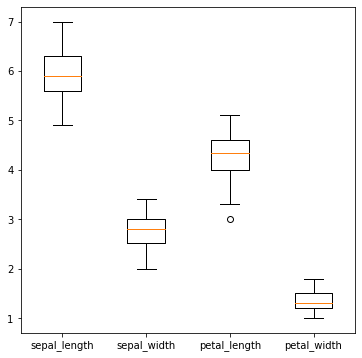

In [28]:
versicolor = iris[iris.species == 'versicolor'].iloc[:, : -1]
plt.figure(figsize=(6,6))
plt.boxplot(versicolor, labels=class_versicolor.columns)
plt.show()

# 꼿잎 길이에 이상치 1개 

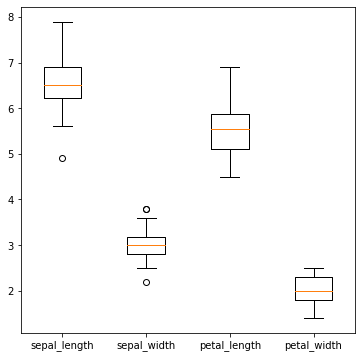

In [29]:
import matplotlib.pyplot as plt 
virginica = iris[iris.species == 'virginica'].iloc[:, : -1]
plt.figure(figsize=(6,6))
plt.boxplot(virginica, labels=class_virginica.columns)
plt.show()

In [70]:
virginica = iris[iris.species == 'virginica'].iloc[:, : -1]
virginica.count()

sepal_length    50
sepal_width     50
petal_length    50
petal_width     50
dtype: int64

In [ ]:
def get_newstats(s)